# Trainer notes - Python Charmers

Copyright (c) 2018 Python Charmers. All rights reserved. Please do not distribute.

# Python training day 2

- Working with APIs
- Controlling flow - if statements
- Handling errors with exceptions
- Reading and writing essential data formats: CSV, Excel, SQL databases, JSON, time-series
- Indexing and selecting data in Pandas
- Data fusion: joining & merging datasets
- Summarisation with “group by” operations; pivot tables
- Time-series analysis: parsing dates, resampling
- Visualisation and statistical graphics with Seaborn and Matplotlib

## Continuing work with dictionaries and web APIs

In [ ]:
%load http://bit.ly/pythoncharmersurls

In [2]:
# %load http://bit.ly/pythoncharmersurls
OpenWeatherMapApiKey="d1741b0c4ca70aeb629424a1ddcf28a1"
url="https://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}"
postgresqlTrainingDatabase="gis.ceebzpnip62q.ap-southeast-2.rds.amazonaws.com:5432/training"


In [3]:
url="https://api.openweathermap.org/data/2.5/weather"

In [4]:
params = {}  # empty dictionary

In [5]:
# creating a dictionary with values in the form key : value
params = {
    'q' : 'Melbourne,AU' ,
    'appid': OpenWeatherMapApiKey
}

In [6]:
params

{'q': 'Melbourne,AU', 'appid': 'd1741b0c4ca70aeb629424a1ddcf28a1'}

In [8]:
params['q']  # indexing is always a square bracket

'Melbourne,AU'

In [9]:
params['q'] = 'London,GB'
params

{'q': 'London,GB', 'appid': 'd1741b0c4ca70aeb629424a1ddcf28a1'}

In [10]:
import requests

In [11]:
requests.get(url, params)

<Response [200]>

In [12]:
response = requests.get(url, params)

In [13]:
response.json()

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'},
  {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 286.69,
  'pressure': 1015,
  'humidity': 93,
  'temp_min': 285.15,
  'temp_max': 288.15},
 'visibility': 2300,
 'wind': {'speed': 3.1, 'deg': 90},
 'clouds': {'all': 90},
 'dt': 1539640200,
 'sys': {'type': 1,
  'id': 5091,
  'message': 0.0051,
  'country': 'GB',
  'sunrise': 1539584750,
  'sunset': 1539623129},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

## Exercise: What temperature is it in Melbourne?

Change the "q" parameter in the `params` dictionary to be Melbourne,AU. Send the request and find out the temperature for Melbourne.

Hint: you can get the temperature using:

    weather = response.json()
    weather['main']['temp']  # why does this work? what's happening?
    
If you read the docs for the API you will see there's an optional parameter that you can send to the server: units=metric

Add a units key to the `params` dictionary and try the request again. What temperature is Melbourne?

In [14]:
params = {
    'q' : 'Melbourne,AU' ,
    'appid': OpenWeatherMapApiKey
}

In [15]:
params['q'] = 'Jakarta,ID'

In [16]:
response = requests.get(url, params)

In [17]:
weather = response.json()

In [19]:
weather['main']['temp']

298.66

In [20]:
type(weather)

dict

In [21]:
weather.keys() 

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [24]:
weather['main']['temp']

298.66

In [25]:
params['units'] = 'metric'  # assigning to a new key creates the key

In [26]:
params

{'q': 'Jakarta,ID',
 'appid': 'd1741b0c4ca70aeb629424a1ddcf28a1',
 'units': 'metric'}

In [32]:
params['q'] = 'Mordor'

In [33]:
requests.get(url, params).json()['main']['temp']

KeyError: 'main'

In [34]:
response = requests.get(url, params)
weather = response.json()
weather['main']['temp']  # same as above

KeyError: 'main'

In [35]:
weather

{'cod': '404', 'message': 'city not found'}

### Exercise: turning this into a `get_temperature` function

`def` an new `get_temperature` function. It should take a single argument - the city/country code string. In the function update the params dictionary, request the data from the server and `return` the current temperature.

Test with:

- Melbourne
- Brisbane
- Paris,FR

As an extension, put these cities into a list, and write a for loop that queries each city, printing the current temperature.

In [41]:
def get_temperature(city):
    """
    Get the current temperature in degrees C for a given city.
    
    City should be in the form name,country_code
    
    Example:
    
    >>> get_temperature('Melbourne,AU')
    20.4
    """
    params['q'] = city
    response = requests.get(url, params)
    weather = response.json()
    return weather['main']['temp']

In [42]:
cities = ['Melbourne,AU', 'Sydney,AU', 'Paris,FR']

In [43]:
temperatures = []
for city in cities:
    temperatures.append(get_temperature(city))
    
temperatures

[20.34, 21, 15.71]

In [48]:
city.split(',')[0]

'Paris'

In [44]:
temperatures = {}
for city in cities:
    temperatures[city] = get_temperature(city)
    
temperatures

{'Melbourne,AU': 20.34, 'Sydney,AU': 21, 'Paris,FR': 15.71}

What happens when instead of getting nice data you get rubbish data? i.e. it's the real world.

In [51]:
cities = [
    'Sidney', 'Malborne,AU', 'Hobart,Aus', 'Manchester,UK', 'طهران'
]

In [52]:
for city in cities:
    print(city, get_temperature(city))

Sidney 15.7


KeyError: 'main'

In Python Exception handling is designed to help with bad data, not bad code.

In [53]:
for city in cities:
    try:
        print(city, get_temperature(city))
    except:
        print('Some error with', city)

Sidney 15.7
Some error with Malborne,AU
Hobart,Aus 18
Manchester,UK 9.99
Some error with طهران


In [54]:
## NEVER DO THIS!!

try:
    
    
    def some_broken_function(name):
        
        print(str(name) + 7)

except:
    print("Something went wrong")

In [55]:
some_broken_function('Henry')

TypeError: must be str, not int

In [56]:
for city in cities:
    try:
        print(city, get_temperature(city))
    except KeyError as e:
        print('Some error with', city)
        print(e)

Sidney 15.97
Some error with Malborne,AU
'main'
Hobart,Aus 18
Manchester,UK 9.99
Some error with طهران
'main'


## Morning tea - back at 10:50

In [41]:
def get_temperature(city):
    """
    Get the current temperature in degrees C for a given city.
    
    City should be in the form name,country_code
    
    Example:
    
    >>> get_temperature('Melbourne,AU')
    20.4
    """
    params['q'] = city
    response = requests.get(url, params)
    weather = response.json()
    return weather['main']['temp']

In [ ]:
try:
    return weather['main']['temp']
except KeyError:
    return None

In [57]:
import warnings

In [58]:
warnings.warn("Couldn't process" + city)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Couldn't processطهران
  """Entry point for launching an IPython kernel.


### Exercise: Updating the function to handle errors

Update the get_temperatures function to `return None` if there is an error, and to warn before you `return None` that there was a problem. Test   with the cities below to ensure you can run then entire loop.

In [62]:
def get_temperature(city):
    """
    Get the current temperature in degrees C for a given city.
    
    City should be in the form name,country_code
    
    Example:
    
    >>> get_temperature('Melbourne,AU')
    20.4
    """
    params['q'] = city
    response = requests.get(url, params)
    weather = response.json()
    try:
        return weather['main']['temp']
    except KeyError:
        warnings.warn(weather['message'])
        return None

In [63]:
cities = [
    'Sidney', 'Malborne,AU', 'Hobart,Aus', 'Manchester,UK', 'طهران'
]

In [64]:
temperatures = {}
for city in cities:
    temperatures[city] = get_temperature(city)
    
temperatures

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: city not found


{'Sidney': 14.4,
 'Malborne,AU': None,
 'Hobart,Aus': 19,
 'Manchester,UK': 10.3,
 'طهران': None}

## Pandas - not just black and white bears

In [65]:
import pandas as pd

In [67]:
olympics = pd.read_csv('Data/olympics2012.csv')

In [68]:
type(olympics)

pandas.core.frame.DataFrame

In [70]:
olympics.dtypes

Country    object
Gold        int64
Silver      int64
Bronze      int64
dtype: object

In [71]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e759390>,
      dtype=object)

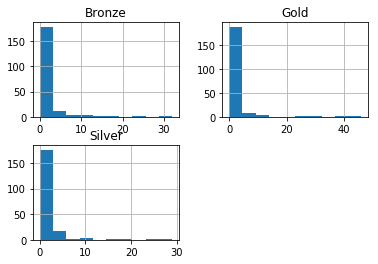

In [72]:
olympics.hist()

In [73]:
olympics['Gold']

0       0
1       0
2       1
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      7
11      0
12      2
13      1
14      0
15      0
16      0
17      2
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      3
27      0
28      0
29      0
       ..
174     0
175     0
176     0
177     1
178     2
179     0
180     0
181     0
182     0
183     0
184     0
185     0
186     0
187     1
188     1
189     2
190     0
191     0
192     1
193     6
194     0
195    46
196     0
197     1
198     0
199     1
200     0
201     0
202     0
203     0
Name: Gold, Length: 204, dtype: int64

In [75]:
olympics = olympics.set_index('Country')

In [76]:
olympics['Gold']

Country
Afghanistan                  0
Albania                      0
Algeria                      1
American Virgin Islands      0
Andorra                      0
Angola                       0
Antigua and Barbuda          0
Argentina                    1
Armenia                      0
Aruba                        0
Australia                    7
Austria                      0
Azerbaijan                   2
Bahamas                      1
Bahrain                      0
Bangladesh                   0
Barbados                     0
Belarus                      2
Belgium                      0
Belize                       0
Benin                        0
Bermuda                      0
Bhutan                       0
Bolivia                      0
Bosnia and Herzegovina       0
Botswana                     0
Brazil                       3
British Virgin Islands       0
Brunei Darussalam            0
Bulgaria                     0
                            ..
Sudan                        0


### Exercise: Totalling the number of medals

You can access each column individually. What happens when you add the Gold and Silver column together?

Calculate the total number of medals won for each country.

You can assign a new column to a dataframe in the same way you assign a new key in a dictionary. Create a new 'Total' column in the `olympics` DataFrame. To test, try the following line:

In [79]:
olympics['Gold'] + olympics['Silver'] + olympics['Bronze']

Country
Afghanistan                   1
Albania                       0
Algeria                       1
American Virgin Islands       0
Andorra                       0
Angola                        0
Antigua and Barbuda           0
Argentina                     4
Armenia                       3
Aruba                         0
Australia                    35
Austria                       0
Azerbaijan                   10
Bahamas                       1
Bahrain                       1
Bangladesh                    0
Barbados                      0
Belarus                      12
Belgium                       3
Belize                        0
Benin                         0
Bermuda                       0
Bhutan                        0
Bolivia                       0
Bosnia and Herzegovina        0
Botswana                      1
Brazil                       17
British Virgin Islands        0
Brunei Darussalam             0
Bulgaria                      2
                           ... 


In [80]:
olympics['Total'] = olympics['Gold'] + olympics['Silver'] + olympics['Bronze']

In [82]:
olympics.sample(5)

,Gold,Silver,Bronze,Total
Country,,,,
Montenegro,0,1,0,1
Congo,0,0,0,0
Belize,0,0,0,0
Sweden,1,4,3,8
Yemen,0,0,0,0


In [83]:
olympics['Total'] * 2

Country
Afghanistan                   2
Albania                       0
Algeria                       2
American Virgin Islands       0
Andorra                       0
Angola                        0
Antigua and Barbuda           0
Argentina                     8
Armenia                       6
Aruba                         0
Australia                    70
Austria                       0
Azerbaijan                   20
Bahamas                       2
Bahrain                       2
Bangladesh                    0
Barbados                      0
Belarus                      24
Belgium                       6
Belize                        0
Benin                         0
Bermuda                       0
Bhutan                        0
Bolivia                       0
Bosnia and Herzegovina        0
Botswana                      2
Brazil                       34
British Virgin Islands        0
Brunei Darussalam             0
Bulgaria                      4
                           ... 


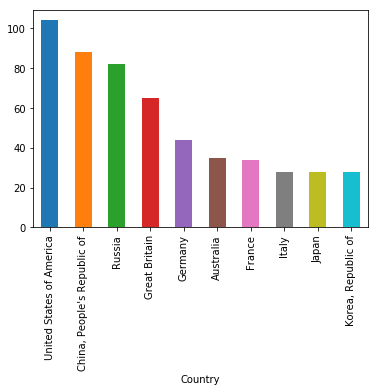

In [84]:
olympics['Total'].nlargest(10).plot(kind='bar')

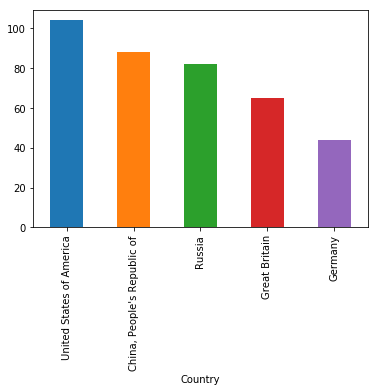

In [91]:
olympics['Total'].nlargest(5).plot(kind='bar')

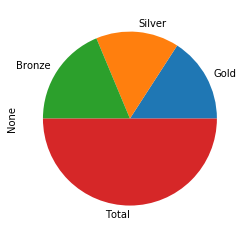

In [93]:
olympics.sum().plot(kind='pie')

In [94]:
olympics.describe()

,Gold,Silver,Bronze,Total
count,204.000000,204.000000,204.000000,204.000000
mean,1.480392,1.441176,1.745098,4.666667
std,5.213152,4.145324,4.398133,13.323806
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,3.000000
max,46.000000,29.000000,32.000000,104.000000


In [95]:
populations = pd.read_csv('Data/country_populations_by_year.csv')

In [98]:
populations = populations.set_index('Country Name')

### Exercise: What country won the most medals per person?

There is a `'2012'` population column (don't forget the quotes - the headers are strings). Look at the column - hopefully the index will look somewhat familiar. What happens if you divide the total number of medals by the population for that year?

Use the same `.nlargest(10).plot(kind='bar')` on the result to plot out the countries with the highest medal total per person. Which country got the top?

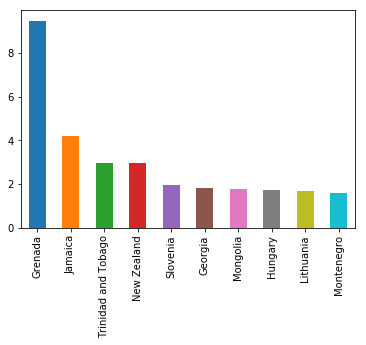

In [102]:
(olympics['Total'] / populations['2012'] * 1e6).nlargest(10).plot(kind='bar')

In [104]:
len(olympics['Total'] / populations['2012'] * 1e6)

296

In [105]:
len(olympics)

204

In [106]:
len(populations)

264

In [108]:
olympics.index.difference(populations.index)  # in olympics, not pop

Index(['American Virgin Islands', 'Bahamas', 'Burma (Myanmar)', 'Cape Verde',
       'China, People's Republic of', 'Congo',
       'Congo, the Democratic Republic of the', 'Cook Islands', 'DPR Korea',
       'Egypt', 'Former Yugoslav Republic of Macedonia', 'Gambia',
       'Gaza Strip/Palestine/West Bank', 'Great Britain', 'Hong Kong', 'Iran',
       'Korea, Republic of', 'Kyrgyzstan', 'Laos', 'Micronesia', 'Russia',
       'Samoa, American', 'Slovakia', 'St Kitts and Nevis', 'St Lucia',
       'St Vincent and the Grenadines', 'Syria', 'Taiwan(2)',
       'United States of America', 'Venezuela', 'Viet Nam', 'Yemen'],
      dtype='object')

In [109]:
populations.index.difference(olympics.index)  # in pop, not olympics

Index(['American Samoa', 'Arab World', 'Bahamas, The', 'Cabo Verde',
       'Caribbean small states', 'Central Europe and the Baltics',
       'Channel Islands', 'China', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Curacao', 'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.',
       'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Faroe Islands', 'Fragile and conflict affected situations',
       'French Polynesia', 'Gambia, The', 'Gibraltar', 'Greenland',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Hong Kong SAR, China', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
       'IDA only', 'IDA total', 'Iran, Islamic Rep.', 'Isle of Man',
       'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republi

In [110]:
name_mapping = { # key is the old index, value is new index
    'China': "China, People's Reupublic of",
    'United States': 'United States of America',
    'United Kingdom': 'Great Britain'
}

In [111]:
populations.rename(index=name_mapping)  # returns a new dataframe

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,...,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,1.052640e+05,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,1.015233e+07,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5.643182e+06,5.753024e+06,5.866061e+06,5.980417e+06,6.093321e+06,6.203299e+06,6.309770e+06,...,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,2.978419e+07,NaN
Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,NaN
Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,...,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04,NaN
Arab World,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,1.092306e+08,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08,NaN
United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,9.263400e+04,1.010780e+05,1.124720e+05,1.255660e+05,1.385290e+05,1.503620e+05,1.604810e+05,...,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06,9.400145e+06,NaN
Argentina,ARG,"Population, total",SP.POP.TOTL,2.061908e+07,2.095308e+07,2.128768e+07,2.162184e+07,2.195393e+07,2.228339e+07,2.260875e+07,...,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,4.427104e+07,NaN
Armenia,ARM,"Population, total",SP.POP.TOTL,1.874120e+06,1.941491e+06,2.009526e+06,2.077575e+06,2.144998e+06,2.211316e+06,2.276031e+06,...,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06,2.930450e+06,NaN


## Joining data together

In [112]:
olympics.join(populations)

,Gold,Silver,Bronze,Total,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,1,1,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
Albania,0,0,0,0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
Algeria,1,0,0,1,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,11690153.0,...,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0,NaN
American Virgin Islands,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0,0,0,0,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
Angola,0,0,0,0,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
Antigua and Barbuda,0,0,0,0,ATG,"Population, total",SP.POP.TOTL,55339.0,56144.0,57144.0,...,93581.0,94661.0,95719.0,96777.0,97824.0,98875.0,99923.0,100963.0,102012.0,NaN
Argentina,1,1,2,4,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,...,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,44271041.0,NaN
Armenia,0,1,2,3,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,...,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,2930450.0,NaN


### Exercise: Different methods of joining data together

If you have a look at the help for the `join` method, you'll see there is a `how` keyword argument. By default it is a `left` join. The options are:

- left
- right
- inner
- outer

How do these joins work? Try calcuating

    len(olympics.join(populations, how='...'))
    
for each type of join. What has the most number of rows? What has the least. If you look at the data, where are missing values?

In [115]:
olympics.join(populations, how='left')

,Gold,Silver,Bronze,Total,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,1,1,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
Albania,0,0,0,0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
Algeria,1,0,0,1,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,11690153.0,...,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0,NaN
American Virgin Islands,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0,0,0,0,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
Angola,0,0,0,0,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
Antigua and Barbuda,0,0,0,0,ATG,"Population, total",SP.POP.TOTL,55339.0,56144.0,57144.0,...,93581.0,94661.0,95719.0,96777.0,97824.0,98875.0,99923.0,100963.0,102012.0,NaN
Argentina,1,1,2,4,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,...,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,44271041.0,NaN
Armenia,0,1,2,3,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,...,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,2930450.0,NaN


In [116]:
olympics.join(populations, how='right')

,Gold,Silver,Bronze,Total,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.0,0.0,0.0,0.0,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,...,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,1.052640e+05,NaN
Afghanistan,0.0,0.0,1.0,1.0,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07,NaN
Angola,0.0,0.0,0.0,0.0,AGO,"Population, total",SP.POP.TOTL,5.643182e+06,5.753024e+06,5.866061e+06,...,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,2.978419e+07,NaN
Albania,0.0,0.0,0.0,0.0,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,NaN
Andorra,0.0,0.0,0.0,0.0,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,...,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04,NaN
Arab World,NaN,NaN,NaN,NaN,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08,NaN
United Arab Emirates,0.0,0.0,0.0,0.0,ARE,"Population, total",SP.POP.TOTL,9.263400e+04,1.010780e+05,1.124720e+05,...,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06,9.400145e+06,NaN
Argentina,1.0,1.0,2.0,4.0,ARG,"Population, total",SP.POP.TOTL,2.061908e+07,2.095308e+07,2.128768e+07,...,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,4.427104e+07,NaN
Armenia,0.0,1.0,2.0,3.0,ARM,"Population, total",SP.POP.TOTL,1.874120e+06,1.941491e+06,2.009526e+06,...,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06,2.930450e+06,NaN


In [117]:
olympics.join(populations, how='inner')  # only matching

,Gold,Silver,Bronze,Total,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Afghanistan,0,0,1,1,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
Albania,0,0,0,0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
Algeria,1,0,0,1,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,11690153.0,...,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0,NaN
Andorra,0,0,0,0,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
Angola,0,0,0,0,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
Antigua and Barbuda,0,0,0,0,ATG,"Population, total",SP.POP.TOTL,55339.0,56144.0,57144.0,...,93581.0,94661.0,95719.0,96777.0,97824.0,98875.0,99923.0,100963.0,102012.0,NaN
Argentina,1,1,2,4,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,...,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,44271041.0,NaN
Armenia,0,1,2,3,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,...,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,2930450.0,NaN
Aruba,0,0,0,0,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
Australia,7,16,12,35,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,...,21691700.0,22031750.0,22340024.0,22742475.0,23145901.0,23504138.0,23850784.0,24210809.0,24598933.0,NaN


In [118]:
olympics.join(populations, how='outer') # everything

,Gold,Silver,Bronze,Total,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Afghanistan,0.0,0.0,1.0,1.0,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07,NaN
Albania,0.0,0.0,0.0,0.0,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,NaN
Algeria,1.0,0.0,0.0,1.0,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,...,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07,NaN
American Samoa,NaN,NaN,NaN,NaN,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,...,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04,NaN
American Virgin Islands,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0.0,0.0,0.0,0.0,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,...,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04,NaN
Angola,0.0,0.0,0.0,0.0,AGO,"Population, total",SP.POP.TOTL,5.643182e+06,5.753024e+06,5.866061e+06,...,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,2.978419e+07,NaN
Antigua and Barbuda,0.0,0.0,0.0,0.0,ATG,"Population, total",SP.POP.TOTL,5.533900e+04,5.614400e+04,5.714400e+04,...,9.358100e+04,9.466100e+04,9.571900e+04,9.677700e+04,9.782400e+04,9.887500e+04,9.992300e+04,1.009630e+05,1.020120e+05,NaN
Arab World,NaN,NaN,NaN,NaN,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08,NaN
Argentina,1.0,1.0,2.0,4.0,ARG,"Population, total",SP.POP.TOTL,2.061908e+07,2.095308e+07,2.128768e+07,...,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,4.427104e+07,NaN


If you need something more complex, e.g. the columns aren't already indexes, use the `pd.merge` function. You can even merge on multiple columns.

In [119]:
pd.merge?

In [120]:
pd.read_csv('Data/traffic/Crashes_Last_Five_Years.csv')

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,145.060690,-37.810373,2693452,T20120013207,ABS to receive accident,Finished,26/5/2012,11.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,BOROONDARA,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
1,144.991172,-37.883157,2693453,T20120013209,ABS to receive accident,Finished,6/6/2012,15.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2,145.009458,-37.826952,2693454,T20120013212,ABS to receive accident,Finished,24/5/2012,09.00.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,YARRA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
3,145.134597,-37.841546,2693455,T20120013213,ABS to receive accident,Finished,6/6/2012,17.02.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
4,145.294599,-37.888597,2693456,T20120013219,ABS to receive accident,Finished,22/5/2012,16.30.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,KNOX,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Arterial Highway,Local Road,Arterial Other",Undivided,Undivided,Metro
5,146.277090,-38.183242,2693457,T20120013221,ABS to receive accident,Finished,6/6/2012,18.15.00,Yes,Collision with vehicle,...,"Small Provincial Cities,Country",LATROBE,"EASTERN REGION,EASTERN REGION",C,C,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Country
6,145.008044,-37.783915,2693458,T20120013223,ABS to receive accident,Finished,6/6/2012,18.30.00,Yes,Struck Pedestrian,...,Metropolitan Excluding CBD,"YARRA,DAREBIN",METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
7,145.125165,-37.659316,2693459,T20120013224,ABS to receive accident,Finished,6/6/2012,15.00.00,No,Collision with vehicle,...,Country,NILLUMBIK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
8,145.211209,-37.982088,2693460,T20120013225,ABS to receive accident,Finished,5/6/2012,17.30.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,DANDENONG,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Arterial Highway,Local Road",Undivided,Undivided,Metro
9,145.110783,-37.872920,2693461,T20120013230,ABS to receive accident,Finished,6/6/2012,16.15.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,MONASH,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro


## Lunch: Back at 1:20

## Index, selecting and filtering data

In [121]:
abalone = pd.read_csv(
    'Data/abalone.csv',
    index_col=0
)

In [122]:
len(abalone)

4177

In [123]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [124]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [125]:
abalone.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [126]:
import seaborn

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


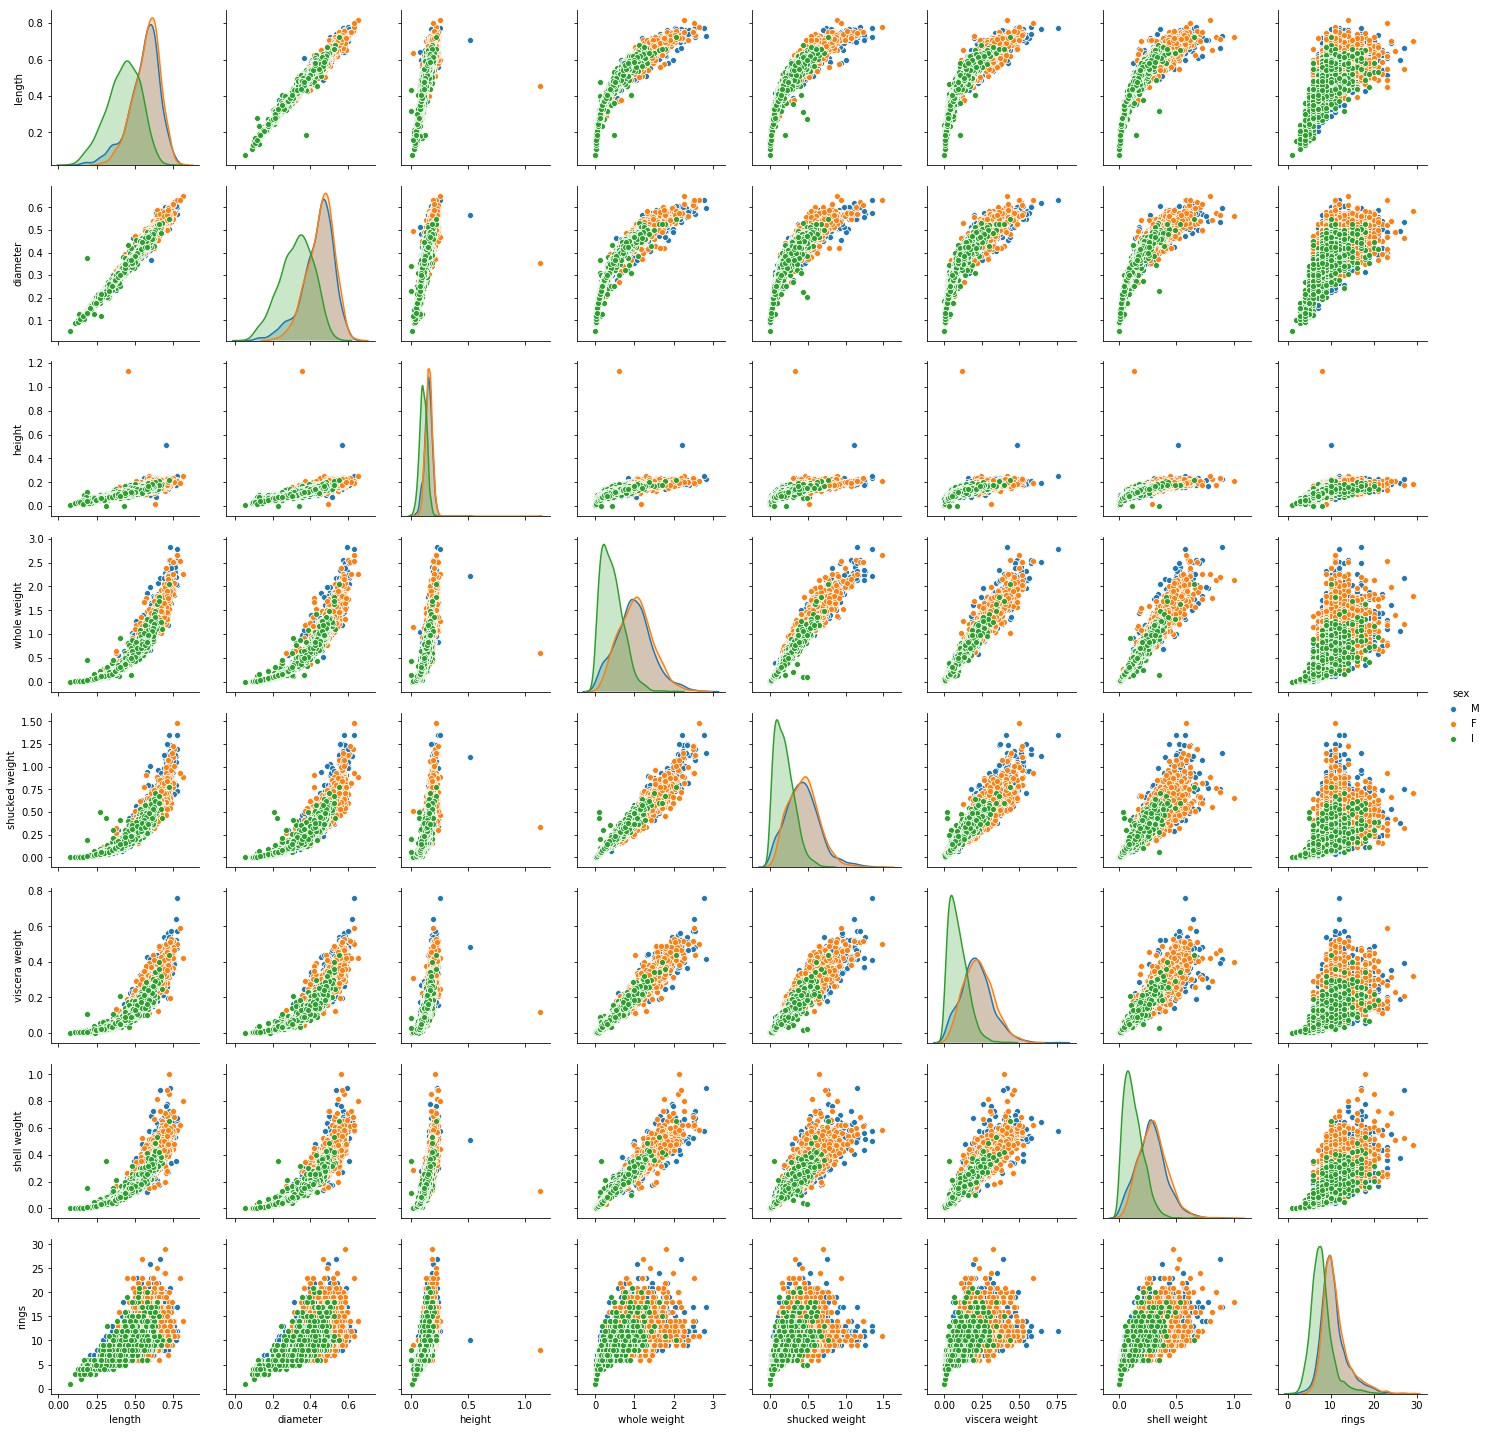

In [129]:
seaborn.pairplot(abalone, hue='sex')

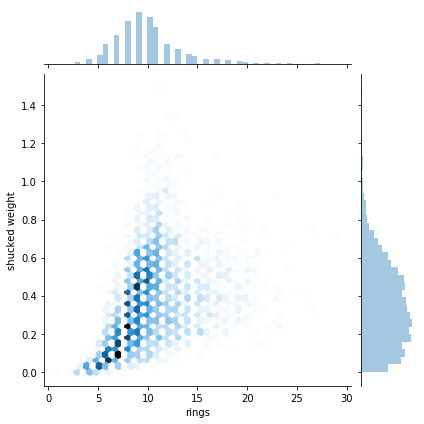

In [132]:
seaborn.jointplot(
    x='rings', y='shucked weight', data=abalone,
    kind='hexgrid'
)

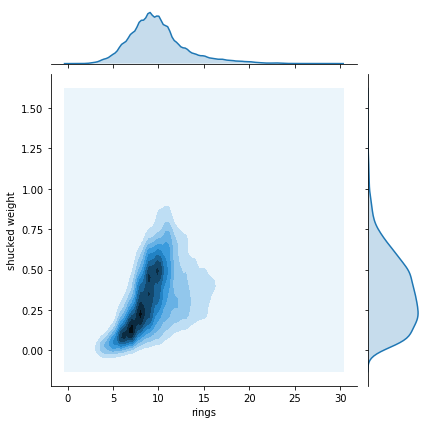

In [133]:
seaborn.jointplot(
    x='rings', y='shucked weight', data=abalone,
    kind='kde'
)

In [134]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [136]:
abalone = abalone.set_index('sex')

In [137]:
abalone

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
sex,,,,,,,,
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9


In [143]:
abalone.loc['I'].mean()

length            0.427746
diameter          0.326494
height            0.107996
whole weight      0.431363
shucked weight    0.191035
viscera weight    0.092010
shell weight      0.128182
rings             7.890462
dtype: float64

### Exercise: Indexing data to calculate statistics

You have three sexes on your abalone. What is the average (`mean`) diameter, and schucked weight?

You can use `abalone.reset_index()` to unset 'sex' as an index. Set the index to the number of rings. What is the average shucked weight for a 10 year old abalone? how about a 15 year old?

In [146]:
abalone.loc['F', 'shucked weight'].mean()

0.44618783473603674

In [147]:
abalone = abalone.reset_index()

In [148]:
abalone = abalone.set_index('rings')

In [150]:
abalone.loc[15, 'shucked weight'].mean()

0.4024708737864079

In [151]:
abalone = abalone.sort_index()

In [152]:
abalone.loc[10:15]  # index slicing in pandas
# INCLUDES the final index

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
rings,,,,,,,,
10,M,0.485,0.370,0.140,0.5725,0.2040,0.1415,0.1750
10,M,0.570,0.440,0.145,0.8815,0.3605,0.1955,0.2735
10,M,0.515,0.385,0.130,0.6230,0.2855,0.1285,0.1750
10,M,0.630,0.490,0.165,1.2005,0.5750,0.2730,0.2940
10,M,0.630,0.485,0.160,1.2430,0.6230,0.2750,0.3000
10,I,0.500,0.385,0.150,0.6265,0.2605,0.1665,0.1600
10,M,0.500,0.375,0.150,0.6360,0.2535,0.1450,0.1900
10,M,0.340,0.275,0.090,0.2065,0.0725,0.0430,0.0700
10,M,0.510,0.400,0.140,0.6515,0.2455,0.1665,0.1850


In [154]:
populations.loc['Australia': 'Brazil', '1984':'2017']

,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Australia,15544000.0,15758000.0,16018400.0,16263900.0,16532200.0,16814400.0,17065100.0,17284000.0,17495000.0,17667000.0,...,21249200.0,21691700.0,22031750.0,22340024.0,22742475.0,23145901.0,23504138.0,23850784.0,24210809.0,24598933.0
Austria,7561434.0,7564985.0,7569794.0,7574586.0,7585317.0,7619567.0,7677850.0,7754891.0,7840709.0,7905633.0,...,8321496.0,8343323.0,8363404.0,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8809212.0
Azerbaijan,6557585.0,6666455.0,6778633.0,6893500.0,7010036.0,7126891.0,7159000.0,7271000.0,7382000.0,7495000.0,...,8763400.0,8947243.0,9054332.0,9173082.0,9295784.0,9416801.0,9535079.0,9649341.0,9757812.0,9862429.0
Burundi,4571292.0,4702066.0,4841565.0,4987736.0,5135956.0,5280024.0,5415415.0,5542048.0,5661139.0,5771398.0,...,8212264.0,8489031.0,8766930.0,9043508.0,9319710.0,9600186.0,9891790.0,10199270.0,10524117.0,10864245.0
Belgium,9855372.0,9858308.0,9861823.0,9870234.0,9901664.0,9937697.0,9967379.0,10004486.0,10045158.0,10084475.0,...,10709973.0,10796493.0,10895586.0,11047744.0,11128246.0,11182817.0,11209057.0,11274196.0,11331422.0,11372068.0
Benin,4156819.0,4278501.0,4404506.0,4535263.0,4672852.0,4820016.0,4978496.0,5149499.0,5331803.0,5521763.0,...,8696916.0,8944706.0,9199259.0,9460802.0,9729160.0,10004451.0,10286712.0,10575952.0,10872298.0,11175692.0
Burkina Faso,7531242.0,7727907.0,7930694.0,8140073.0,8356305.0,8579823.0,8811034.0,9050084.0,9297113.0,9552476.0,...,14689726.0,15141099.0,15605217.0,16081904.0,16571216.0,17072723.0,17585977.0,18110624.0,18646433.0,19193382.0
Bangladesh,90732362.0,93199865.0,95742431.0,98343809.0,100975321.0,103599232.0,106188642.0,108727432.0,111221938.0,113695139.0,...,148805814.0,150454708.0,152149102.0,153911916.0,155727053.0,157571292.0,159405279.0,161200886.0,162951560.0,164669751.0
Bulgaria,8960679.0,8960547.0,8958171.0,8971359.0,8981446.0,8876972.0,8718289.0,8632367.0,8540164.0,8472313.0,...,7492561.0,7444443.0,7395599.0,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075991.0


In [155]:
populations.loc[:, '1984': '2017']  # every row

,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,6.283600e+04,6.302600e+04,6.264400e+04,6.183300e+04,6.107900e+04,6.103200e+04,6.214900e+04,6.462200e+04,6.823500e+04,7.250400e+04,...,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,1.052640e+05
Afghanistan,1.204712e+07,1.178305e+07,1.160104e+07,1.150276e+07,1.154089e+07,1.177761e+07,1.224911e+07,1.299366e+07,1.398123e+07,1.509510e+07,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
Angola,1.027732e+07,1.060904e+07,1.092104e+07,1.121827e+07,1.151397e+07,1.182724e+07,1.217144e+07,1.255345e+07,1.296834e+07,1.340373e+07,...,2.175942e+07,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,2.978419e+07
Albania,2.904429e+06,2.964762e+06,3.022635e+06,3.083605e+06,3.142336e+06,3.227943e+06,3.286542e+06,3.266790e+06,3.247039e+06,3.227287e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
Andorra,4.270600e+04,4.460000e+04,4.651700e+04,4.845500e+04,5.043400e+04,5.244800e+04,5.450900e+04,5.667100e+04,5.888800e+04,6.097100e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
Arab World,1.876108e+08,1.933103e+08,1.990938e+08,2.049425e+08,2.108448e+08,2.167874e+08,2.247354e+08,2.308299e+08,2.350372e+08,2.412861e+08,...,3.398255e+08,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08
United Arab Emirates,1.318478e+06,1.391052e+06,1.472218e+06,1.560718e+06,1.655849e+06,1.756043e+06,1.860174e+06,1.970026e+06,2.086639e+06,2.207405e+06,...,6.894278e+06,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06,9.400145e+06
Argentina,2.992090e+07,3.038878e+07,3.085724e+07,3.132647e+07,3.179552e+07,3.226356e+07,3.272974e+07,3.319392e+07,3.365515e+07,3.411092e+07,...,4.038239e+07,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,4.427104e+07
Armenia,3.285595e+06,3.335935e+06,3.392256e+06,3.451942e+06,3.504651e+06,3.536469e+06,3.538165e+06,3.505251e+06,3.442810e+06,3.363098e+06,...,2.908220e+06,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06,2.930450e+06


In [156]:
columns = ['length', 'shucked weight']
abalone[columns]

,length,shucked weight
rings,,
1,0.075,0.0010
2,0.150,0.0045
3,0.210,0.0155
3,0.215,0.0150
3,0.165,0.0070
3,0.195,0.0180
3,0.240,0.0310
3,0.160,0.0065
3,0.205,0.0235


In [157]:
rows = [1, 6, 11, 16, 21]
abalone.loc[rows]

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
rings,,,,,,,,
1,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015
6,I,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300
6,I,0.295,0.220,0.070,0.1365,0.0575,0.0295,0.0350
6,I,0.450,0.330,0.100,0.4110,0.1945,0.1000,0.0980
6,I,0.275,0.220,0.080,0.1365,0.0565,0.0285,0.0420
6,M,0.350,0.265,0.090,0.2265,0.0995,0.0575,0.0650
6,I,0.360,0.265,0.085,0.1895,0.0725,0.0515,0.0550
6,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400
6,I,0.215,0.170,0.055,0.0605,0.0205,0.0140,0.0200


In [158]:
abalone.loc[rows, columns]

,length,shucked weight
rings,,
1,0.075,0.0010
6,0.270,0.0265
6,0.295,0.0575
6,0.450,0.1945
6,0.275,0.0565
6,0.350,0.0995
6,0.360,0.0725
6,0.310,0.0480
6,0.215,0.0205


In [159]:
abalone['shucked weight'].mean()

0.3593674886282023

In [160]:
abalone['sex'] == 'F'  # sex equals to F

rings
1     False
2     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
3     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
4     False
      ...  
21    False
21     True
21    False
21    False
21    False
21     True
21     True
21    False
22    False
22     True
22     True
22    False
22    False
22     True
23    False
23     True
23    False
23     True
23    False
23     True
23     True
23     True
23     True
24    False
24     True
25     True
26    False
27    False
27     True
29     True
Name: sex, Length: 4177, dtype: bool

In [161]:
abalone['sex'] != 'I'  # sex is not equal to I

rings
1     False
2     False
3      True
3     False
3     False
3     False
3     False
3     False
3     False
3      True
3     False
3     False
3     False
3     False
3      True
3     False
3     False
4     False
4     False
4     False
4     False
4     False
4      True
4     False
4     False
4     False
4     False
4      True
4     False
4     False
      ...  
21    False
21     True
21     True
21     True
21     True
21     True
21     True
21     True
22     True
22     True
22     True
22     True
22     True
22     True
23     True
23     True
23     True
23     True
23     True
23     True
23     True
23     True
23     True
24     True
24     True
25     True
26     True
27     True
27     True
29     True
Name: sex, Length: 4177, dtype: bool

In [163]:
mask = abalone['shucked weight'] > abalone['shucked weight'].mean()

In [164]:
abalone.loc[mask]

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
rings,,,,,,,,
5,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315
5,I,0.310,0.225,0.070,0.1055,0.4350,0.0150,0.0400
6,F,0.660,0.475,0.180,1.3695,0.6410,0.2940,0.3350
6,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515
6,F,0.530,0.420,0.170,0.8280,0.4100,0.2080,0.1505
6,F,0.595,0.475,0.160,1.1405,0.5470,0.2310,0.2710
7,M,0.575,0.450,0.155,0.9480,0.4290,0.2060,0.2590
7,M,0.535,0.405,0.140,0.8180,0.4020,0.1715,0.1890
7,M,0.560,0.450,0.140,0.9000,0.4720,0.1820,0.2180


In [165]:
populations.filter(like='United', axis=0)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92634.0,101078.0,112472.0,125566.0,138529.0,150362.0,160481.0,...,7666393.0,8270684.0,8672475.0,8900453.0,9006263.0,9070867.0,9154302.0,9269612.0,9400145.0,NaN
United Kingdom,GBR,"Population, total",SP.POP.TOTL,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,54648500.0,...,62276270.0,62766365.0,63258918.0,63700300.0,64128226.0,64613160.0,65128861.0,65595565.0,66022273.0,NaN
United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,...,306771529.0,309338421.0,311644280.0,313993272.0,316234505.0,318622525.0,321039839.0,323405935.0,325719178.0,NaN


In [166]:
crashes = pd.read_csv(
    'Data/traffic/Crashes_Last_Five_Years.csv')

In [169]:
crashes['BICYCLIST']

0        0
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       1
11       0
12       1
13       1
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
76421    0
76422    0
76423    0
76424    0
76425    0
76426    0
76427    0
76428    0
76429    0
76430    0
76431    0
76432    0
76433    0
76434    0
76435    0
76436    0
76437    0
76438    0
76439    1
76440    0
76441    0
76442    0
76443    1
76444    0
76445    1
76446    1
76447    0
76448    0
76449    0
76450    0
Name: BICYCLIST, Length: 76451, dtype: int64

### Exercise: Boolean filtering accindents

How many accidents involved at least 1 `BICYCLIST` or at least `PEDESTRIAN`. Create two masks - one for cyclists, one for pedestrians. You can combine boolean operations with an `&` for a boolean "and", or you can use a `|` for a boolean "or". Use one of these operations to merge the pedestrian and bicyclist mask, and use the merged mask to filter the crashes dataset. What is the `len` (and what is the total percentage)?

In [173]:
cyclist_mask = crashes['BICYCLIST'] >= 1
ped_mask = crashes['PEDESTRIAN'] >= 1

In [174]:
crashes.loc[cyclist_mask & ped_mask]

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
963,144.978630,-37.797381,2694415,T20120012453,ABS to receive accident,Finished,27/5/2012,00.36.00,Yes,Struck Pedestrian,...,Metropolitan Excluding CBD,YARRA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
1389,145.011103,-37.960802,2689841,T20120003374,ABS to receive accident,Finished,12/2/2012,08.30.00,Yes,Struck Pedestrian,...,Metropolitan Excluding CBD,BAYSIDE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2093,141.598622,-38.341986,2702545,T20120028355,ABS to receive accident,Finished,18/12/2012,13.30.00,No,Struck Pedestrian,...,Other Towns,GLENELG,SOUTH WESTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2380,144.957323,-37.813712,2702832,T20130004619,ABS to receive accident,Finished,4/3/2013,07.52.00,No,Struck Pedestrian,...,Metropolitan CBD Only,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
3284,144.776423,-37.733789,2696736,T20120020577,ABS to receive accident,Finished,28/8/2012,15.15.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
3486,144.925871,-37.769950,2696938,T20120020686,ABS to receive accident,Finished,11/9/2012,08.20.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,MOONEE VALLEY,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
4001,144.928174,-37.775134,2688453,T20120000124,ABS to receive accident,Finished,3/1/2012,09.30.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,MOONEE VALLEY,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
4491,144.966989,-37.816485,2688943,T20120001479,ABS to receive accident,Finished,18/1/2012,17.00.00,No,Struck Pedestrian,...,Metropolitan CBD Only,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
4644,145.014367,-37.773875,2689096,T20120001825,ABS to receive accident,Finished,24/1/2012,18.34.00,Yes,Struck Pedestrian,...,Metropolitan Excluding CBD,DAREBIN,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
5623,144.969553,-37.803145,2693075,T20120007397,ABS to receive accident,Finished,28/3/2012,15.05.00,No,Struck Pedestrian,...,Metropolitan Excluding CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro


In [177]:
len(crashes.loc[cyclist_mask | ped_mask]) / len(crashes)

0.1973028475755713

In [179]:
ped_mask.sum()

7162

In [181]:
(crashes['FATALITY'] >= 1).sum()

1331

## Aggregation in Pandas

In [182]:
abalone = pd.read_csv(
    'Data/abalone.csv', index_col=0) 

In [184]:
abalone.pivot_table(
    values='diameter',
    index='rings',
    columns='sex',
    aggfunc='max'
)

sex,F,I,M
rings,,,
1,NaN,0.055,NaN
2,NaN,0.100,NaN
3,NaN,0.175,0.150
4,NaN,0.270,0.230
5,0.275,0.340,0.305
6,0.475,0.450,0.410
7,0.525,0.420,0.510
8,0.530,0.480,0.565
9,0.580,0.500,0.570


In [186]:
abalone.pivot_table(
    values=['diameter', 'shucked weight'],
    index='rings',
    columns='sex',
    aggfunc=['max', 'min', 'mean']
)

max                                                   min         \
      diameter               shucked weight                 diameter          
sex          F      I      M              F       I       M        F      I   
rings                                                                         
1          NaN  0.055    NaN            NaN  0.0010     NaN      NaN  0.055   
2          NaN  0.100    NaN            NaN  0.0045     NaN      NaN  0.100   
3          NaN  0.175  0.150            NaN  0.0310  0.0155      NaN  0.090   
4          NaN  0.270  0.230            NaN  0.0875  0.0600      NaN  0.095   
5        0.275  0.340  0.305         0.1040  0.4950  0.1395    0.195  0.120   
6        0.475  0.450  0.410         0.6410  0.3630  0.3205    0.210  0.125   
7        0.525  0.420  0.510         0.6310  0.4240  0.7070    0.225  0.195   
8        0.530  0.480  0.565         0.7595  0.4955  0.8255    0.265  0.195   
9        0.580  0.500  0.570         1.1565  0.6035  1.2530    0.255  0.205   
10       0.585  0.550  0.600         1.0745  0.7735  1.1705    0.260  0.260   
11       0.630  0.525  0.605         1.4880  0.6725  1.2455    0.305  0.260   
12       0.615  0.495  0.630         0.9925  0.6430  1.3485    0.300  0.280   
13       0.575  0.500  0.605         0.9130  0.7150  1.3510    0.300  0.245   
14       0.650  0.475  0.585         1.2320  0.5500  1.2395    0.355  0.305   
15       0.575  0.525  0.570         0.6935  0.6025  0.7510    0.360  0.350   
16       0.600  0.500  0.575         0.8045  0.6255  0.8835    0.315  0.330   
17       0.565  0.515  0.595         0.7245  0.5805  1.1465    0.360  0.420   
18       0.585  0.525  0.540         0.8435  0.5970  0.7665    0.350  0.370   
19       0.580  0.390  0.570         0.8150  0.2415  0.8665    0.410  0.355   
20       0.575  0.445  0.580         0.7650  0.3935  0.7415    0.400  0.420   
21       0.550  0.415  0.590         0.6275  0.3845  0.6370    0.365  0.415   
22       0.525    NaN  0.540         0.4535     NaN  0.7425    0.395    NaN   
23       0.630    NaN  0.490         0.9330     NaN  0.4335    0.380    NaN   
24       0.540    NaN  0.540         0.6675     NaN  0.5330    0.540    NaN   
25       0.490    NaN    NaN         0.4265     NaN     NaN    0.490    NaN   
26         NaN    NaN  0.495            NaN     NaN  0.3840      NaN    NaN   
27       0.465    NaN  0.535         0.3245     NaN  0.7535    0.465    NaN   
29       0.585    NaN    NaN         0.7055     NaN     NaN    0.585    NaN   

                                                 mean                      \
             shucked weight                  diameter                       
sex        M              F       I       M         F         I         M   
rings                                                                       
1        NaN            NaN  0.0010     NaN       NaN  0.055000       NaN   
2        NaN            NaN  0.0045     NaN       NaN  0.100000       NaN   
3      0.110            NaN  0.0025  0.0065       NaN  0.128750  0.128333   
4      0.125            NaN  0.0050  0.0095       NaN  0.161667  0.160833   
5      0.115         0.0310  0.0075  0.0090  0.241250  0.211550  0.191818   
6      0.190         0.0760  0.0090  0.0385  0.349062  0.272269  0.290000   
7      0.155         0.0585  0.0305  0.0170  0.363864  0.307659  0.344563   
8      0.195         0.0780  0.0360  0.0315  0.418238  0.355657  0.407500   
9      0.225         0.0625  0.0485  0.0455  0.447899  0.386879  0.429658   
10     0.225         0.0745  0.0705  0.0535  0.456512  0.411576  0.455000   
11     0.235         0.1250  0.0780  0.0415  0.482650  0.410887  0.476333   
12     0.265         0.1045  0.1165  0.0575  0.467813  0.400238  0.467669   
13     0.255         0.1075  0.0635  0.1000  0.460682  0.403958  0.466209   
14     0.330         0.1650  0.0915  0.1315  0.475268  0.403929  0.454911   
15     0.325         0.1725  0.2085  0.1000  0.461220  0.428000  0.457788   
16     0.350       

In [188]:
crashes['ALCOHOL_RELATED' ]

0        Metropolitan Excluding CBD
1        Metropolitan Excluding CBD
2        Metropolitan Excluding CBD
3        Metropolitan Excluding CBD
4        Metropolitan Excluding CBD
5           Small Provincial Cities
6        Metropolitan Excluding CBD
7                           Country
8        Metropolitan Excluding CBD
9        Metropolitan Excluding CBD
10       Metropolitan Excluding CBD
11                      Small Towns
12       Metropolitan Excluding CBD
13                      Other Towns
14       Metropolitan Excluding CBD
15       Metropolitan Excluding CBD
16          Small Provincial Cities
17                          Country
18       Metropolitan Excluding CBD
19                          Country
20       Metropolitan Excluding CBD
21                          Country
22       Metropolitan Excluding CBD
23                          Country
24       Metropolitan Excluding CBD
25       Metropolitan Excluding CBD
26       Metropolitan Excluding CBD
27                          

### Exercise: Aggregating crash stats

You have a large dataset of crash data. Are there more accidents involving men in urban areas vs women? Or more accidents in rural areas?

Create a pivot table that aggregates with the values being `['MALES', 'FEMALES']`, the index should be the 'DEG_URBAN_NAME', columns should be 'ALCOHOL_RELATED', and finally the aggregation function should be the sum, to see how many of each group were involved.

To visualise the function, use

In [190]:
results = crashes.pivot_table(
    values=['MALES', 'FEMALES'],
    index='DEG_URBAN_NAME',
    columns='ALCOHOL_RELATED',
    aggfunc='sum'
)

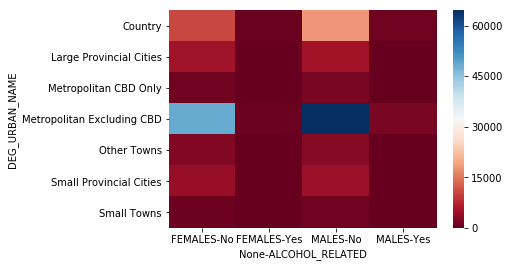

In [196]:
seaborn.heatmap(data=results, cmap='RdBu')

In [197]:
results

FEMALES       MALES      
ALCOHOL_RELATED                 No  Yes     No   Yes
DEG_URBAN_NAME                                      
Country                      10725  309  17966   977
Large Provincial Cities       4943   66   5263   195
Metropolitan CBD Only          806    7   1537    15
Metropolitan Excluding CBD   48513  653  64518  1646
Other Towns                   2355   39   2955   131
Small Provincial Cities       4235   74   4599   184
Small Towns                    559   11    825    48

## The pandas group-by

In [199]:
gb = crashes.groupby('DEG_URBAN_NAME')

In [201]:
gb.median()

,X,Y,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,...,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
DEG_URBAN_NAME,,,,,,,,,,,,,,,,,,,,,
Country,145.138221,-37.622689,2728034.5,274931.0,145.138220,-37.622690,2.512227e+06,2.430121e+06,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Large Provincial Cities,144.310816,-37.598984,2727281.0,72367.0,144.310815,-37.598985,2.438883e+06,2.432910e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Metropolitan CBD Only,144.962708,-37.814248,2724032.0,65799.0,144.962710,-37.814250,2.496716e+06,2.409641e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
Metropolitan Excluding CBD,145.028331,-37.828741,2726239.0,243666.0,145.028330,-37.828740,2.502490e+06,2.408026e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Other Towns,145.034967,-37.471133,2726277.5,260430.0,145.034965,-37.471130,2.503121e+06,2.447644e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
Small Provincial Cities,145.357488,-37.686268,2726604.0,253531.0,145.357490,-37.686270,2.532069e+06,2.423750e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Small Towns,145.272157,-37.643529,2726258.0,272770.0,145.272160,-37.643530,2.524031e+06,2.427787e+06,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [202]:
gb.describe()

BICYCLIST                                          \
                               count      mean       std  min  25%  50%  75%   
DEG_URBAN_NAME                                                                 
Country                      15732.0  0.023837  0.175779  0.0  0.0  0.0  0.0   
Large Provincial Cities       4278.0  0.096073  0.299448  0.0  0.0  0.0  0.0   
Metropolitan CBD Only         1073.0  0.362535  0.488653  0.0  0.0  0.0  1.0   
Metropolitan Excluding CBD   48538.0  0.131938  0.347972  0.0  0.0  0.0  0.0   
Other Towns                   2342.0  0.085824  0.287686  0.0  0.0  0.0  0.0   
Small Provincial Cities       3837.0  0.105291  0.314518  0.0  0.0  0.0  0.0   
Small Towns                    651.0  0.044547  0.234383  0.0  0.0  0.0  0.0   

                                  DRIVER           ...           Y             \
                            max    count      mean ...         75%        max   
DEG_URBAN_NAME                                     ...                          
Country                     5.0  15732.0  1.066425 ...  -37.012452 -34.127673   
Large Provincial Cities     2.0   4278.0  1.590930 ...  -36.821492 -36.650382   
Metropolitan CBD Only       2.0   1073.0  1.095061 ...  -37.811755 -37.807491   
Metropolitan Excluding CBD  8.0  48538.0  1.582183 ...  -37.769732 -37.513451   
Other Towns                 2.0   2342.0  1.360376 ...  -37.030308 -34.165725   
Small Provincial Cities     3.0   3837.0  1.482408 ...  -36.377630 -34.159394   
Small Towns                 3.0    651.0  1.198157 ...  -36.985848 -34.197773   

                           YOUNG_DRIVER                                     \
                                  count      mean       std  min  25%  50%   
DEG_URBAN_NAME                                                               
Country                         15732.0  0.268688  0.476466  0.0  0.0  0.0   
Large Provincial Cities          4278.0  0.378682  0.577526  0.0  0.0  0.0   
Metropolitan CBD Only            1073.0  0.188257  0.418745  0.0  0.0  0.0   
Metropolitan Excluding CBD      48538.0  0.313775  0.533394  0.0  0.0  0.0   
Other Towns                      2342.0  0.269428  0.482496  0.0  0.0  0.0   
Small Provincial Cities          3837.0  0.347667  0.550432  0.0  0.0  0.0   
Small Towns                       651.0  0.253456  0.479069  0.0  0.0  0.0   

                                      
                            75%  max  
DEG_URBAN_NAME                        
Country                     1.0  3.0  
Large Provincial Cities     1.0  5.0  
Metropolitan CBD Only       0.0  2.0  
Metropolitan Excluding CBD  1.0  4.0  
Other Towns                 1.0  3.0  
Small Provincial Cities     1.0  3.0  
Small Towns                 0.0  2.0  

[7 rows x 272 columns]

In [209]:
%time gb['PASSENGER'].sum()

CPU times: user 1.78 ms, sys: 652 µs, total: 2.43 ms
Wall time: 1.62 ms


DEG_URBAN_NAME
Country                        8851
Large Provincial Cities        2594
Metropolitan CBD Only           402
Metropolitan Excluding CBD    23736
Other Towns                    1520
Small Provincial Cities        2329
Small Towns                     459
Name: PASSENGER, dtype: int64

In [210]:
%time gb.sum()['PASSENGER']

CPU times: user 17.9 ms, sys: 27.8 ms, total: 45.8 ms
Wall time: 42.9 ms


DEG_URBAN_NAME
Country                        8851
Large Provincial Cities        2594
Metropolitan CBD Only           402
Metropolitan Excluding CBD    23736
Other Towns                    1520
Small Provincial Cities        2329
Small Towns                     459
Name: PASSENGER, dtype: int64

In [211]:
gb = crashes.groupby('ALCOHOL_RELATED')

In [212]:
gb['MALES'].sum()

ALCOHOL_RELATED
No     97663
Yes     3196
Name: MALES, dtype: int64

## Break - back at 3:45

When we're back

- groupby the abalone data exercise
- time series data
- visualisation

In [213]:
abalone = pd.read_csv('Data/abalone.csv')

### Exercise: groupby by more than one column

If you pass a list of columns to the groupby function you can group by multiple columns. Group the abalone by both the sex and the rings column, and calculate the `mean` of every column.

In [214]:
gb = abalone.groupby(['sex', 'rings'])

In [215]:
gb.mean()

Unnamed: 0    length  diameter    height  whole weight  \
sex rings                                                            
F   5      1352.000000  0.323750  0.241250  0.080000      0.162250   
    6      1993.187500  0.462812  0.349062  0.116875      0.559594   
    7      2099.431818  0.467841  0.363864  0.123068      0.592727   
    8      2056.245902  0.538033  0.418238  0.148279      0.812279   
    9      2179.109244  0.574601  0.447899  0.151807      0.982050   
    10     2106.064516  0.582278  0.456512  0.156855      1.055706   
    11     2188.875000  0.613700  0.482650  0.166050      1.216512   
    12     2008.562500  0.594922  0.467813  0.163242      1.114242   
    13     2121.954545  0.581477  0.460682  0.161307      1.074295   
    14     2006.750000  0.596071  0.475268  0.171250      1.147777   
    15     1877.926829  0.580854  0.461220  0.164146      1.051488   
    16     1472.366667  0.592833  0.476500  0.169667      1.184950   
    17     1428.076923  0.595192  0.471154  0.170769      1.174558   
    18     1959.736842  0.609474  0.482368  0.175000      1.228053   
    19     1121.200000  0.611000  0.488333  0.174000      1.238400   
    20     1087.750000  0.611667  0.488750  0.175833      1.314917   
    21     1858.428571  0.617143  0.472857  0.167143      1.266357   
    22      432.000000  0.581667  0.456667  0.188333      1.095833   
    23     1134.166667  0.588333  0.466667  0.178333      1.218833   
    24     3149.000000  0.700000  0.540000  0.215000      1.978000   
    25     2201.000000  0.645000  0.490000  0.215000      1.406000   
    27     2209.000000  0.550000  0.465000  0.180000      1.212500   
    29      480.000000  0.700000  0.585000  0.185000      1.807500   
I   1       236.000000  0.075000  0.055000  0.010000      0.002000   
    2       719.000000  0.150000  0.100000  0.025000      0.015000   
    3      1708.166667  0.174583  0.128750  0.040417      0.029083   
    4      2015.313725  0.221275  0.161667  0.053529      0.059843   
    5      1933.540000  0.287300  0.211550  0.069750      0.126930   
    6      2181.222222  0.360556  0.272269  0.088773      0.244762   
    7      2050.310861  0.406404  0.307659  0.100243      0.329766   
...                ...       ...       ...       ...           ...   
    16     2274.142857  0.537143  0.415000  0.164286      0.863714   
    17     2507.714286  0.587143  0.462857  0.167143      1.088143   
    18      628.800000  0.547000  0.435000  0.163000      0.993400   
    19     2289.000000  0.485000  0.372500  0.130000      0.572250   
    20     1944.500000  0.555000  0.432500  0.177500      0.965000   
    21      628.000000  0.530000  0.415000  0.145000      0.944000   
M   3      1139.000000  0.181667  0.128333  0.046667      0.025667   
    4      1567.000000  0.223333  0.160833  0.057500      0.057583   
    5      1807.454545  0.257727  0.191818  0.067727      0.099136   
    6      1809.296296  0.384444  0.290000  0.100926      0.330741   
    7      1860.250000  0.449000  0.344563  0.115437      0.515631   
    8      2135.837209  0.524942  0.407500  0.134506      0.766651   
    9      2161.733813  0.550683  0.429658  0.144442      0.898867   
    10     2187.295918  0.581956  0.455000  0.157381      1.059099   
    11     2349.617778  0.605667  0.476333  0.163222      1.189973   
    12     1952.711864  0.595720  0.467669  0.162500      1.157898   
    13     1963.252747  0.592912  0.466209  0.165824      1.169434   
    14     1676.107143  0.578214  0.454911  0.160179      1.101991   
    15     1352.750000  0.578462  0.457788  0.161635      1.071385   
    16     2181.966667  0.594000  0.472833  0.175833      1.144750   
    17     1668.920000  0.611000  0.483200  0.179200      1.337420   
    18     1993.666667  0.595556  0.469722  0.170278      1.214556   
    19     1945.200000  0.595000  0.466333  0.172000      1.174467   
    20     1563.166667  0.603750  0.484167  0.171250      1.236375   
    21      704.666667

## Time series data in pandas

In [219]:
crashes['ACCIDENT_DATE'].dtype

dtype('O')

In [224]:
crashes = crashes.set_index(
    pd.to_datetime(crashes['ACCIDENT_DATE'], dayfirst=True)
)

In [228]:
crashes = crashes.sort_index()

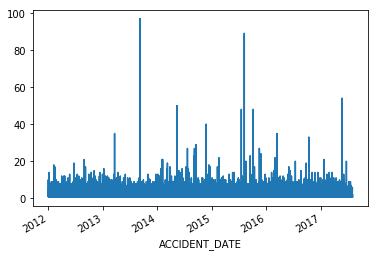

In [230]:
crashes['TOTAL_PERSONS'].plot()

In [ ]:
crashes.loc['2017']

In [232]:
crashes.loc['2017-01']

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,146.788709,-36.320820,2757482,T20170000120,ABS to receive accident,Finished,1/1/2017,08.30.00,Yes,No collision and no object struck,...,Country,INDIGO,NORTH EASTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-01-01,144.718221,-37.857404,2757278,T20170000003,ABS to receive accident,Finished,1/1/2017,00.30.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,WYNDHAM,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2017-01-01,144.319991,-38.307779,2759871,T20170001364,ABS to receive accident,Finished,1/1/2017,14.30.00,No,Collision with vehicle,...,Country,SURF COAST,SOUTH WESTERN REGION,B,B,Arterial Highway,"Arterial Highway,Local Road",Undivided,Undivided,Country
2017-01-01,145.136220,-37.858093,2757581,T20170000049,ABS to receive accident,Finished,1/1/2017,11.53.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,"WHITEHORSE,MONASH",METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2017-01-01,146.296873,-36.348450,2761736,T20170004859,ABS to receive accident,Finished,1/1/2017,01.10.00,Yes,No collision and no object struck,...,Small Provincial Cities,WANGARATTA,NORTH EASTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2017-01-01,145.229688,-37.963112,2757423,T20170000009,ABS to receive accident,Finished,1/1/2017,02.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,DANDENONG,METROPOLITAN SOUTH EAST REGION,M,M,Freeway,Freeway,Undivided,Undivided,Metro
2017-01-01,145.060964,-38.352698,2757424,T20170000011,ABS to receive accident,Finished,1/1/2017,04.50.00,No,Collision with a fixed object,...,Country,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2017-01-01,144.893680,-37.837875,2757575,T20170000036,ABS to receive accident,Finished,1/1/2017,00.15.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,HOBSONS BAY,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2017-01-01,145.240173,-37.983738,2757422,T20170000008,ABS to receive accident,Finished,1/1/2017,01.30.00,Yes,No collision and no object struck,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro


In [233]:
crashes.loc['2015-06-01']

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2015-06-01,145.393306,-36.408938,2734916,T20150011971,ABS to receive accident,Finished,1/6/2015,17.00.00,No,Collision with vehicle,...,Small Provincial Cities,SHEPPARTON,NORTH EASTERN REGION,A,A,Arterial Highway,"Arterial Highway,Local Road",Undivided,Undivided,Country
2015-06-01,145.729873,-37.749819,2735003,T20150011620,ABS to receive accident,Finished,1/6/2015,05.50.00,Yes,Collision with a fixed object,...,Small Towns,YARRA RANGES,METROPOLITAN SOUTH EAST REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2015-06-01,143.835226,-37.623707,2734959,T20150011613,ABS to receive accident,Finished,1/6/2015,06.45.00,No,Collision with vehicle,...,Large Provincial Cities,BALLARAT,WESTERN REGION,A,A,Arterial Highway,Arterial Highway,Undivided,Undivided,Country
2015-06-01,145.162225,-37.997585,2734958,T20150011608,ABS to receive accident,Finished,1/6/2015,06.30.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,DANDENONG,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Arterial Highway,Local Road",Undivided,Undivided,Metro
2015-06-01,144.946884,-37.826573,2735106,T20150011670,ABS to receive accident,Finished,1/6/2015,08.15.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,M,M,Freeway,"Freeway,Arterial Highway",Undivided,Undivided,Metro
2015-06-01,144.755091,-37.710112,2735011,T20150011630,ABS to receive accident,Finished,1/6/2015,09.37.00,No,Collision with a fixed object,...,Metropolitan Excluding CBD,MELTON,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2015-06-01,145.067312,-37.687008,2735012,T20150011632,ABS to receive accident,Finished,1/6/2015,11.45.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,WHITTLESEA,METROPOLITAN NORTH WEST REGION,M,M,Freeway,"Freeway,Arterial Highway",Undivided,Undivided,Metro
2015-06-01,144.910668,-37.806871,2735154,T20150011690,ABS to receive accident,Finished,1/6/2015,23.30.00,Yes,No collision and no object struck,...,Metropolitan Excluding CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Highway,Arterial Highway,Undivided,Undivided,Metro
2015-06-01,144.746778,-37.758586,2737052,T20150012240,ABS to receive accident,Finished,1/6/2015,13.00.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,MELTON,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro


In [234]:
crashes.loc['2013-07': '2014-06']

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
2013-07-01,145.231500,-37.876967,2709652,T20130017262,ABS to receive accident,Finished,1/7/2013,19.00.00,Yes,Collision with vehicle,...,Metropolitan Excluding CBD,KNOX,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2013-07-01,145.041762,-38.257066,2710579,T20130014576,ABS to receive accident,Finished,1/7/2013,13.00.00,No,No collision and no object struck,...,"Metropolitan Excluding CBD,Country",MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2013-07-01,144.937025,-37.738151,2712141,T20130018087,ABS to receive accident,Finished,1/7/2013,15.15.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,MORELAND,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Highway,Arterial Highway,Undivided,Undivided,Metro
2013-07-01,145.263637,-38.005050,2707751,T20130013617,ABS to receive accident,Finished,1/7/2013,08.40.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,Arterial Highway,Undivided,Undivided,Metro
2013-07-01,146.395084,-37.972593,2707753,T20130013620,ABS to receive accident,Finished,1/7/2013,05.30.00,Yes,Collision with a fixed object,...,Country,BAW BAW,"EASTERN REGION,EASTERN REGION",C,C,Arterial Other,Arterial Other,Undivided,Undivided,Country
2013-07-01,144.875942,-37.785702,2711808,T20130018675,ABS to receive accident,Finished,1/7/2013,17.00.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,MARIBYRNONG,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
2013-07-01,143.836065,-37.526224,2707848,T20130013652,ABS to receive accident,Finished,1/7/2013,17.55.00,No,Collision with vehicle,...,Large Provincial Cities,BALLARAT,WESTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
2013-07-01,145.148919,-38.101178,2707755,T20130013622,ABS to receive accident,Finished,1/7/2013,09.14.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,FRANKSTON,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2013-07-01,145.103764,-37.084088,2707796,T20130013630,ABS to receive accident,Finished,1/7/2013,06.50.00,Yes,Vehicle overturned (no collision),...,Country,MITCHELL,NORTHERN REGION,M,M,Freeway,Freeway,Undivided,Undivided,Country


What happens if you want to answer the question: since 2012, what was the worst week  for TOTAL_PERSONS involved in an accident?

In [240]:
rs = crashes.resample('Y')

In [243]:
results = rs['TOTAL_PERSONS'].sum()

In [244]:
results.max()

34363

In [245]:
results.idxmax()

Timestamp('2015-12-31 00:00:00', freq='A-DEC')

### Exercise: What was the worst week on Victoria's roads since 2012?

Aggregate your data by a weekly period. There is a FATALITY column in the dataset. Take the sum of the fatalities each week, and use `idxmax` to find the week with the highest number of fatalities.

In [246]:
crashes['FATALITY'].unique()

array([0, 1, 2, 3, 5, 4])

Q: Is there a central data repository? A: Yes. A few lof them. https://data.gov.au https://data.vic.gov.au

In [260]:
rs = crashes.resample('W')

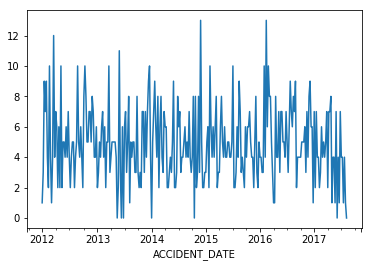

In [261]:
rs['FATALITY'].sum().plot()

In [262]:
result = rs['FATALITY'].sum()

In [263]:
result.max()

13

In [264]:
result.idxmax()

Timestamp('2014-11-30 00:00:00', freq='W-SUN')

In [266]:
result[result == result.max()]

ACCIDENT_DATE
2014-11-30    13
2016-02-14    13
Name: FATALITY, dtype: int64

In [267]:
crashes.rolling('7D')['FATALITY'].sum()

ACCIDENT_DATE
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
2012-01-01    1.0
             ... 
2017-07-25    3.0
2017-07-25    3.0
2017-07-25    3.0
2017-07-25    3.0
2017-07-25    3.0
2017-07-25    3.0
2017-07-25    3.0
2017-07-25    3.0
2017-07-25    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-26    3.0
2017-07-27    2.0
2017-07-28    2.0
2017-07-28    2.0
2017-07-28    2.0
2017-07-29    1.0
2017-07-30    

In [269]:
crashes.resample('D')['FATALITY'].sum().rolling('7D').sum().idxmax()

Timestamp('2014-11-30 00:00:00', freq='D')

### Parsing dates when reading files - more options when reading data

In [279]:
rainfall = pd.read_csv(
    'Data/Rainfall/10010.csv',
    header=None,
    names=['date', 'rain'],
    parse_dates=['date'],
    dayfirst=True,
    index_col='date'
)

### Exercise: parsing more dates, and joining on dates

Read in the one of the other stations, 10011, 10012, or 10013. Read it in, parsing the dates as above. Try the pandas `join` to join these two datasets together, based on the date. *Hint* If you look at the help there is a left suffix and right suffix keyword arguments - if your rain columns are named the same you *must* supply a suffix for both - use the station ID as a string.

In [282]:
rainfall_2 = pd.read_csv(
    'Data/Rainfall/10011.csv',
    header=None,
    names=['date', 'rain'],
    parse_dates=['date'],
    dayfirst=True,
    index_col='date'
)

In [284]:
rainfall.join(rainfall_2, lsuffix='10010', rsuffix='10011')

,rain10010,station,rain10011
date,,,
1930-09-01,0.000000,10010,0.000000
1930-09-02,0.000000,10010,0.000000
1930-09-03,0.000000,10010,0.000000
1930-09-04,0.000000,10010,0.570040
1930-09-05,3.063430,10010,7.221712
1930-09-06,1.967835,10010,4.145608
1930-09-07,1.090469,10010,2.250725
1930-09-08,0.610020,10010,1.090647
1930-09-09,0.346879,10010,0.489856


### Exercise to finish the day - building a colour scheme in seaborn

Use the function below to create your own diverging colour palette. Note, you only need to run the cell once to active the controls - the value for cmap is automatically updated.

In [286]:
cmap = seaborn.choose_diverging_palette(as_cmap=True)

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

In [288]:
cmap = seaborn.choose_colorbrewer_palette('diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

To test this, use:

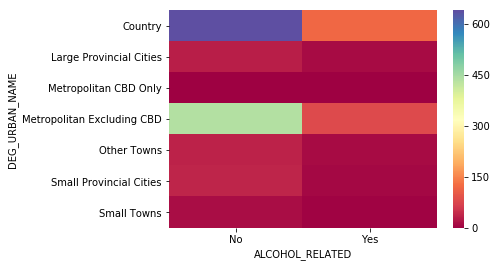

In [289]:
seaborn.heatmap(
    crashes.pivot_table(
        'FATALITY', 'DEG_URBAN_NAME', 'ALCOHOL_RELATED', 'sum'),
    cmap=cmap
)